In [1]:
# importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading dataset

data = pd.read_csv('student-data.csv')
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


In [3]:
# checking shape
data.shape

(395, 31)

In [4]:
# checking for null values

data.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
passed        0
dtype: int64

### Pre-processing

In [5]:
# checking info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [6]:
#checking the number of unique values in columns

data.nunique()

school         2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      34
passed         2
dtype: int64

In [7]:
# encoding
# label encoding categorical binary data

binary_feature = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities',
           'nursery','higher', 'internet', 'romantic', 'passed']

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data[binary_feature] = data[binary_feature].apply(le.fit_transform)

In [8]:
# one hat encoding of other categorical columns

data = pd.get_dummies(data)

In [9]:
data.dtypes #to check encoding

school               int32
sex                  int32
age                  int64
address              int32
famsize              int32
Pstatus              int32
Medu                 int64
Fedu                 int64
traveltime           int64
studytime            int64
failures             int64
schoolsup            int32
famsup               int32
paid                 int32
activities           int32
nursery              int32
higher               int32
internet             int32
romantic             int32
famrel               int64
freetime             int64
goout                int64
Dalc                 int64
Walc                 int64
health               int64
absences             int64
passed               int32
Mjob_at_home         uint8
Mjob_health          uint8
Mjob_other           uint8
Mjob_services        uint8
Mjob_teacher         uint8
Fjob_at_home         uint8
Fjob_health          uint8
Fjob_other           uint8
Fjob_services        uint8
Fjob_teacher         uint8
r

In [10]:
# correlation of different features with target

data.corr()['passed'].sort_values()

failures            -0.337731
goout               -0.183399
age                 -0.179645
guardian_other      -0.107977
schoolsup           -0.099860
romantic            -0.097737
reason_course       -0.092534
absences            -0.092244
Mjob_other          -0.074163
health              -0.065668
famsup              -0.059219
Dalc                -0.057343
traveltime          -0.044446
Pstatus             -0.044050
Fjob_services       -0.041572
Mjob_at_home        -0.039031
Fjob_at_home        -0.034839
school              -0.031254
Walc                -0.029957
freetime            -0.018321
nursery             -0.008784
Fjob_health         -0.001962
reason_home         -0.001526
Mjob_teacher         0.001349
guardian_mother      0.009890
activities           0.012414
Fjob_other           0.026180
famsize              0.041842
famrel               0.046683
address              0.052282
Fjob_teacher         0.052557
reason_other         0.053316
guardian_father      0.059347
Mjob_servi

Failures have a high negative correlation with the target

In [11]:
# to check percentage of values in target column

data['passed'].value_counts(normalize=True)

1    0.670886
0    0.329114
Name: passed, dtype: float64

Dataset is slightly imbalanced

In [12]:
#splitting the data in taget and features

y = data['passed']
X= data.drop(['passed'], axis=1)

In [13]:
X.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,0.116456,0.473418,16.696203,0.777215,0.288608,0.896203,2.749367,2.521519,1.448101,2.035443,...,0.549367,0.281013,0.073418,0.367089,0.275949,0.091139,0.265823,0.227848,0.691139,0.081013
std,0.321177,0.499926,1.276043,0.416643,0.453690,0.305384,1.094735,1.088201,0.697505,0.839240,...,0.498188,0.450064,0.261152,0.482622,0.447558,0.288172,0.442331,0.419976,0.462610,0.273201
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,16.000000,1.000000,0.000000,1.000000,2.000000,2.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,17.000000,1.000000,0.000000,1.000000,3.000000,2.000000,1.000000,2.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,1.000000,18.000000,1.000000,1.000000,1.000000,4.000000,3.000000,2.000000,2.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
# To rescale features with distribution value between 0 and 1

min_max = preprocessing.MinMaxScaler(feature_range=(0,1))
X=min_max.fit_transform(X)
X=pd.DataFrame(X)

In [15]:
X.describe()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.00000,395.000000,395.000000,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,0.116456,0.473418,0.242315,0.777215,0.288608,0.896203,0.687342,0.63038,0.149367,0.345148,...,0.549367,0.281013,0.073418,0.367089,0.275949,0.091139,0.265823,0.227848,0.691139,0.081013
std,0.321177,0.499926,0.182292,0.416643,0.453690,0.305384,0.273684,0.27205,0.232502,0.279747,...,0.498188,0.450064,0.261152,0.482622,0.447558,0.288172,0.442331,0.419976,0.462610,0.273201
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.142857,1.000000,0.000000,1.000000,0.500000,0.50000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.285714,1.000000,0.000000,1.000000,0.750000,0.50000,0.000000,0.333333,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,1.000000,0.428571,1.000000,1.000000,1.000000,1.000000,0.75000,0.333333,0.333333,...,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
# Splitting the dataset into train and test

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [17]:
X_train.shape

(316, 43)

# Training Models

In [18]:
import time
from sklearn.metrics import accuracy_score, f1_score

In [19]:
results = {'Classifier':[], 'Training time':[], 'Testing Time':[], 'F1 Score (test)':[]}

In [20]:
# defing classifier

def classifier(cls, X_train, y_train, X_test, y_test):
    print('Classification Model: {} \n'.format(cls.__class__.__name__))
    start_train = time.time()
    cls.fit(X_train, y_train)
    stop_train = time.time()
    train_time=round((stop_train-start_train), 4)
    print('Training time: ',train_time,'seconds')
    start_test = time.time()
    y_pred = cls.predict(X_test)
    stop_test = time.time()
    test_time=round((stop_test-start_test), 4)
    print('Test time: ',test_time,'seconds','\n')
    f1 = f1_score(y_test, y_pred).round(4)
    print('F1 Score: ',f1,'\n')
    results['Classifier'].append(cls.__class__.__name__)
    results['Training time'].append(train_time)
    results['Testing Time'].append(test_time)
    results['F1 Score (test)'].append(f1)

## 1. Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
cls = LogisticRegression()
classifier (cls, X_train, y_train, X_test, y_test)

Classification Model: LogisticRegression 

Training time:  0.027 seconds
Test time:  0.0156 seconds 

F1 Score:  0.8034 



## 2. kNN       

In [22]:
# Finding the optimum k value
from sklearn.neighbors import KNeighborsClassifier
values=[]
neighbors=np.arange(3,18)
for k in neighbors:
    cls=KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    cls.fit(X_train, y_train)
    y_pred=cls.predict(X_test)
    score=accuracy_score(y_test, y_pred)
    values.append(score)

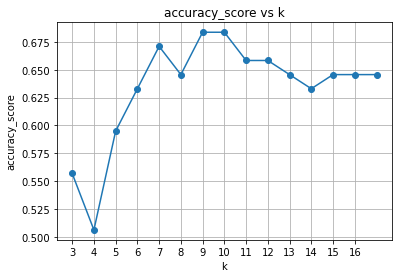

In [23]:
# plotting k vs accuracy_score to get optimum k
plt.plot(neighbors, values, 'o-')
plt.title('accuracy_score vs k')
plt.xticks(np.arange(3.0, 16.0+1, 1.0))
plt.xlabel('k')
plt.ylabel('accuracy_score')
plt.grid()
plt.show()

optimum k = 9

In [24]:
cls=KNeighborsClassifier(n_neighbors=9, metric='minkowski')
classifier (cls, X_train, y_train, X_test, y_test)

Classification Model: KNeighborsClassifier 

Training time:  0.004 seconds
Test time:  0.0 seconds 

F1 Score:  0.7967 



## 3. SVM

In [25]:
from sklearn.svm import SVC
cls = SVC()
classifier (cls, X_train, y_train, X_test, y_test)

Classification Model: SVC 

Training time:  0.0141 seconds
Test time:  0.0106 seconds 

F1 Score:  0.7874 



## 4. Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier
cls=DecisionTreeClassifier()
classifier (cls, X_train, y_train, X_test, y_test)

Classification Model: DecisionTreeClassifier 

Training time:  0.0145 seconds
Test time:  0.002 seconds 

F1 Score:  0.7455 



## 5. Random Forest Classifier 

In [27]:
from sklearn.ensemble import RandomForestClassifier
cls=RandomForestClassifier()
classifier (cls, X_train, y_train, X_test, y_test)

Classification Model: RandomForestClassifier 

Training time:  0.2711 seconds
Test time:  0.0312 seconds 

F1 Score:  0.7769 



## 6. Gradient Boosting

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
cls = GradientBoostingClassifier()
classifier (cls, X_train, y_train, X_test, y_test)

Classification Model: GradientBoostingClassifier 

Training time:  0.1569 seconds
Test time:  0.003 seconds 

F1 Score:  0.7826 



## Consolidated results

In [29]:
pd.DataFrame(results)

,Classifier,Training time,Testing Time,F1 Score (test)
0,LogisticRegression,0.0270,0.0156,0.8034
1,KNeighborsClassifier,0.0040,0.0000,0.7967
2,SVC,0.0141,0.0106,0.7874
3,DecisionTreeClassifier,0.0145,0.0020,0.7455
4,RandomForestClassifier,0.2711,0.0312,0.7769
5,GradientBoostingClassifier,0.1569,0.0030,0.7826


The most accurate model is Logistic regression which has the Maximum F-score(0.80) & time taken to compute is also not so long.

kNN also got a relatively high F1-score and it takes much less time than Logestiv Regression.

Decision tree has got the least F1-Score.